# Imports


In [73]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

# Load the csv file to pandas data frame

In [74]:
data_path = "/content/bank-full.csv"
df = pd.read_csv(data_path,delimiter=';')


## See the data

In [75]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [76]:
### print how many different values in given column ###

def get_unique_values(df, column_name):
  return df[column_name].unique()

get_unique_values(df, 'education')


array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

## Some basic info about the data

In [77]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## Visualizing Distribution

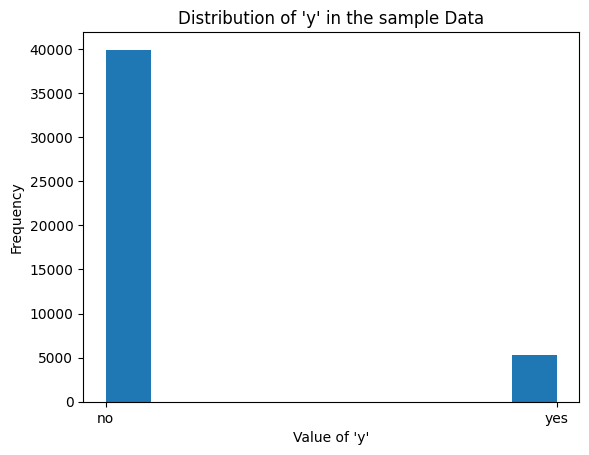

In [78]:
plt.hist(df['y'])
plt.xlabel("Value of 'y'")
plt.ylabel("Frequency")
plt.title("Distribution of 'y' in the sample Data")
plt.show()


#PCA

## Data Processing

### One-hot-encoding
  - No inherent order among categories {red, blue, green}
  - Encoding {martial, contact, month, poutcome, job}

In [79]:
df = pd.get_dummies(df, columns=['marital', 'contact', 'month', 'poutcome', 'job'])

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 46 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                45211 non-null  int64 
 1   education          45211 non-null  object
 2   default            45211 non-null  object
 3   balance            45211 non-null  int64 
 4   housing            45211 non-null  object
 5   loan               45211 non-null  object
 6   day                45211 non-null  int64 
 7   duration           45211 non-null  int64 
 8   campaign           45211 non-null  int64 
 9   pdays              45211 non-null  int64 
 10  previous           45211 non-null  int64 
 11  y                  45211 non-null  object
 12  marital_divorced   45211 non-null  uint8 
 13  marital_married    45211 non-null  uint8 
 14  marital_single     45211 non-null  uint8 
 15  contact_cellular   45211 non-null  uint8 
 16  contact_telephone  45211 non-null  uint8

In [81]:
df.head()

,age,education,default,balance,housing,loan,day,duration,campaign,pdays,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,tertiary,no,2143,yes,no,5,261,1,-1,...,0,0,1,0,0,0,0,0,0,0
1,44,secondary,no,29,yes,no,5,151,1,-1,...,0,0,0,0,0,0,0,1,0,0
2,33,secondary,no,2,yes,yes,5,76,1,-1,...,1,0,0,0,0,0,0,0,0,0
3,47,unknown,no,1506,yes,no,5,92,1,-1,...,0,0,0,0,0,0,0,0,0,0
4,33,unknown,no,1,no,no,5,198,1,-1,...,0,0,0,0,0,0,0,0,0,1


### Label Encoding
  - Categories have natural order { low, medium, high }
  - Label encoding { education, default, housing, loan, y }

In [82]:
if df['education'].dtype != int:
 df['education'] = df['education'].map({'unknown':0, 'primary':1, 'secondary':2, 'tertiary':3})

if df['default'].dtype != int:
  df['default'] = df['default'].map({'yes':1, 'no':0})

if df['housing'].dtype != int:
  df['housing'] = df['housing'].map({'yes':1, 'no':0})

if df['loan'].dtype != int:
  df['loan'] = df['loan'].map({'yes':1, 'no':0})

if df['y'].dtype != int:
  df['y'] = df['y'].map({'yes':1, 'no':0})


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 46 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                45211 non-null  int64
 1   education          45211 non-null  int64
 2   default            45211 non-null  int64
 3   balance            45211 non-null  int64
 4   housing            45211 non-null  int64
 5   loan               45211 non-null  int64
 6   day                45211 non-null  int64
 7   duration           45211 non-null  int64
 8   campaign           45211 non-null  int64
 9   pdays              45211 non-null  int64
 10  previous           45211 non-null  int64
 11  y                  45211 non-null  int64
 12  marital_divorced   45211 non-null  uint8
 13  marital_married    45211 non-null  uint8
 14  marital_single     45211 non-null  uint8
 15  contact_cellular   45211 non-null  uint8
 16  contact_telephone  45211 non-null  uint8
 17  contact_unkn

In [84]:
df.head()

,age,education,default,balance,housing,loan,day,duration,campaign,pdays,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,3,0,2143,1,0,5,261,1,-1,...,0,0,1,0,0,0,0,0,0,0
1,44,2,0,29,1,0,5,151,1,-1,...,0,0,0,0,0,0,0,1,0,0
2,33,2,0,2,1,1,5,76,1,-1,...,1,0,0,0,0,0,0,0,0,0
3,47,0,0,1506,1,0,5,92,1,-1,...,0,0,0,0,0,0,0,0,0,0
4,33,0,0,1,0,0,5,198,1,-1,...,0,0,0,0,0,0,0,0,0,1


## Separate features (X) and target variable (y)

In [85]:
X = df.drop(columns=['y'])
y = df['y']

##  Split data into training and testing sets

In [86]:
# prompt:  Split data into training and testing sets:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)


## Apply standerization

In [87]:
# prompt: apply standerization

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Perform PCA

In [88]:
pca = PCA(n_components=0.95)  # Keep components explaining 95% of the variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

### PCA evaluation

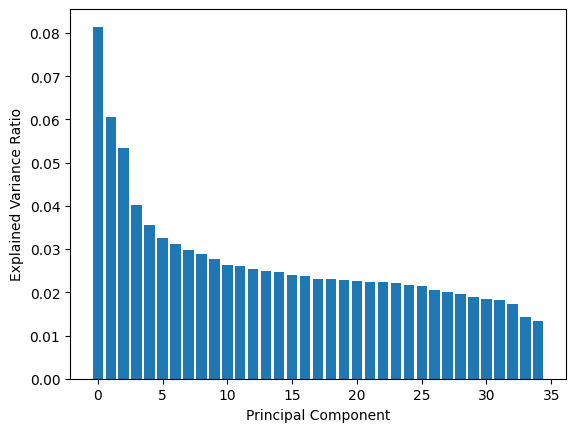

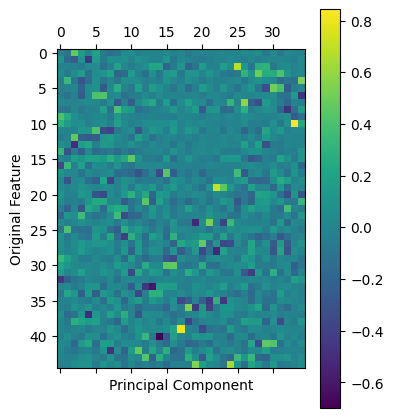

In [89]:
# Explained variance
plt.bar(range(pca.n_components_), pca.explained_variance_ratio_)
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.show()

# Component loadings
plt.matshow(pca.components_.T, cmap="viridis")
plt.xlabel("Principal Component")
plt.ylabel("Original Feature")
plt.colorbar()
plt.show()

# Performe Logistic Regression

## Run model

In [90]:
model = LogisticRegression(max_iter=20000, penalty='l2')

In [91]:
model.fit(X_train_pca, y_train)

LogisticRegression(max_iter=20000)

## Evaluate

In [92]:
y_pred = model.predict(X_test_pca)

In [93]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.900364923144974
Precision: 0.6202090592334495
Recall: 0.3426371511068335
F1-score: 0.44141351518908867
Confusion Matrix:
 [[7786  218]
 [ 683  356]]


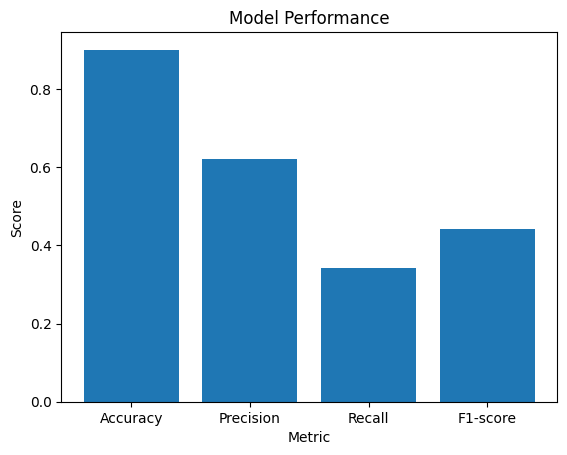

In [94]:
# prompt: vizualize the metrics

metrics = [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)]
labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']
plt.bar(labels, metrics)
plt.xlabel("Metric")
plt.ylabel("Score")
plt.title("Model Performance")
plt.show()


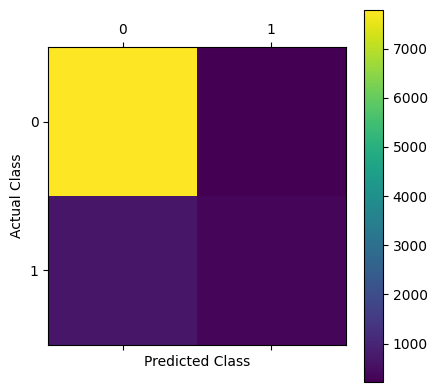

In [95]:
# prompt: Vizualize confusion metrics

plt.matshow(confusion_matrix(y_test, y_pred), cmap="viridis")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.colorbar()
plt.show()
